## Sentiment Analysis on Stock market tweets 


Dataset source :https://github.com/nunomroliveira/stock_market_sentiment

In [782]:
# Import spaCy and load the language library. Remember to use a larger model!

import spacy
nlp =spacy.load('en_core_web_lg')

In [783]:


import numpy as np
import pandas as pd

import nltk
import re
import string

In [784]:
stock =pd.read_csv("stock_tweets.csv" ,encoding='unicode_escape',error_bad_lines=False)
stock

,created_at,text,sentiment
0,2013-01-01 20:10:04,Kickers on my watchlist $XIDE $TRIT $SOQ $PNK ...,positive
1,2013-01-01 20:33:37,"""@user: $AAPL MOVIE. 55% return for the FEAR/G...",positive
2,2013-01-01 21:43:41,@user I'd be afraid to short $AMZN - they are ...,positive
3,2013-01-02 01:49:48,$MNTA Over $12.00 URL,positive
4,2013-01-02 01:51:33,$OI Over $21.37 URL,positive
...,...,...,...
4995,2013-03-31 21:35:26,"If $AAPL goes to over $451, I will go short. S...",negative
4996,2013-03-31 21:37:55,$MMM looks ready to break out. Looking to go l...,positive
4997,2013-03-31 22:54:02,$AMZN - Closed over volume support inside of t...,positive
4998,2013-03-31 23:22:15,$BBT coiled up after finding support at 50/200...,positive


In [785]:
stock['sentiment'].value_counts()

positive    3350
negative    1650
Name: sentiment, dtype: int64

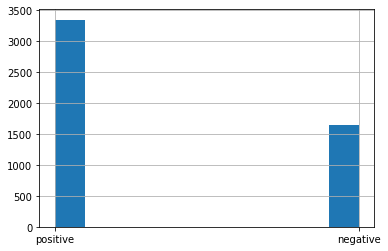

In [786]:
stock['sentiment'].hist()

We can see that negative class is almost 50 percent of postive class hence we shall not proceed with class balancing

# Data cleaning on text data

In [787]:
# check for null values
stock.isna().sum()

created_at    0
text          0
sentiment     0
dtype: int64

In [788]:
# define a function to clean the text data
# use re. sub() function which is used to replace occurrences of a particular sub-string with another sub-string.

def text_cleaning(text):
    text =text.lower()                     # make in lower case
    text = re.sub('\[.*?@\]','',text)      # remove text in square brackets
    text =re.sub('\n' ,'',text)
    text = re.sub('\w*\d\w*','' ,text)      # remove words containing numbers
    text.lstrip("$")                        # removes $ sign from start of string   
    text.strip()
    text =re.sub('[!@#$]','',text)          # replace given characters from string
    return text
    

In [789]:
stock['text'] = stock['text'].apply( lambda x:text_cleaning(x))

In [790]:
stock

,created_at,text,sentiment
0,2013-01-01 20:10:04,kickers on my watchlist xide trit soq pnk cpwr...,positive
1,2013-01-01 20:33:37,"""user: aapl movie. % return for the fear/greed...",positive
2,2013-01-01 21:43:41,user i'd be afraid to short amzn - they are lo...,positive
3,2013-01-02 01:49:48,mnta over . url,positive
4,2013-01-02 01:51:33,oi over . url,positive
...,...,...,...
4995,2013-03-31 21:35:26,"if aapl goes to over , i will go short. still ...",negative
4996,2013-03-31 21:37:55,mmm looks ready to break out. looking to go lo...,positive
4997,2013-03-31 22:54:02,amzn - closed over volume support inside of th...,positive
4998,2013-03-31 23:22:15,bbt coiled up after finding support at / sma's...,positive


# Tokenization

In [791]:
def tokenization(text):
    tokens= re.split('W+',text)
    return tokens

stock['tokenized_text'] =stock['text'].apply(lambda x : tokenization(x))

# Stemming

In [792]:
from nltk.stem.porter import PorterStemmer
porter =PorterStemmer()

In [793]:
def stemming(text):
    stemtext= [porter.stem(i) for i in text]
    return stemtext

stock['stemmed_text'] =stock['tokenized_text'].apply(lambda x : stemming(x))

# Lemmatization

In [794]:
from nltk.stem import WordNetLemmatizer

In [795]:
lemma =WordNetLemmatizer()

In [796]:
def lemmatization(text):
    lem_text = [lemma.lemmatize(i) for i in text]
    return lem_text

stock['lemmatized_text'] =stock['tokenized_text'].apply(lambda x : lemmatization(x))

In [797]:
stock

,created_at,text,sentiment,tokenized_text,stemmed_text,lemmatized_text
0,2013-01-01 20:10:04,kickers on my watchlist xide trit soq pnk cpwr...,positive,[kickers on my watchlist xide trit soq pnk cpw...,[kickers on my watchlist xide trit soq pnk cpw...,[kickers on my watchlist xide trit soq pnk cpw...
1,2013-01-01 20:33:37,"""user: aapl movie. % return for the fear/greed...",positive,"[""user: aapl movie. % return for the fear/gree...","[""user: aapl movie. % return for the fear/gree...","[""user: aapl movie. % return for the fear/gree..."
2,2013-01-01 21:43:41,user i'd be afraid to short amzn - they are lo...,positive,[user i'd be afraid to short amzn - they are l...,[user i'd be afraid to short amzn - they are l...,[user i'd be afraid to short amzn - they are l...
3,2013-01-02 01:49:48,mnta over . url,positive,[mnta over . url ],[mnta over . url ],[mnta over . url ]
4,2013-01-02 01:51:33,oi over . url,positive,[oi over . url ],[oi over . url ],[oi over . url ]
...,...,...,...,...,...,...
4995,2013-03-31 21:35:26,"if aapl goes to over , i will go short. still ...",negative,"[if aapl goes to over , i will go short. still...","[if aapl goes to over , i will go short. still...","[if aapl goes to over , i will go short. still..."
4996,2013-03-31 21:37:55,mmm looks ready to break out. looking to go lo...,positive,[mmm looks ready to break out. looking to go l...,[mmm looks ready to break out. looking to go l...,[mmm looks ready to break out. looking to go l...
4997,2013-03-31 22:54:02,amzn - closed over volume support inside of th...,positive,[amzn - closed over volume support inside of t...,[amzn - closed over volume support inside of t...,[amzn - closed over volume support inside of t...
4998,2013-03-31 23:22:15,bbt coiled up after finding support at / sma's...,positive,[bbt coiled up after finding support at / sma'...,[bbt coiled up after finding support at / sma'...,[bbt coiled up after finding support at / sma'...


# Stp words removal

In [798]:
print(nlp.Defaults.stop_words)

{'whereupon', 'n‘t', 'whoever', 'ca', 'serious', 'seemed', 'been', 'few', 'which', 'there', 'myself', 'part', 'seeming', 'indeed', 'call', 'another', 'namely', 'show', 'used', 'for', 'sometime', 'wherever', 'bottom', 'ever', 'fifteen', 'ten', 'top', 'done', 'noone', 'not', 'yourself', 'beyond', 'afterwards', 'move', 'more', 'most', 'therein', 'back', "'ve", 'my', 'himself', '‘ll', 'any', 'perhaps', 'something', 'last', 'until', 'anyhow', 'nobody', 'our', 'hereby', 're', 'hers', 'does', 'put', 'every', 'into', 'such', 'they', 'everywhere', 'one', 'always', 'has', 'full', 'anyway', 'third', 'us', 'it', 'towards', 'almost', 'on', 'out', 'her', 'as', 'might', 'same', 'your', 'me', 'hundred', 'together', 'the', 'already', 'an', 'eight', 'mostly', 'have', 'further', 'only', 'using', 'what', 'whereas', 'though', 'name', 'being', 'became', 'regarding', 'side', 'moreover', 'under', 'did', 'whether', 'amongst', 'that', 'whence', 'when', 'we', 'empty', 'well', 'herself', 'eleven', 'whither', 'say

In [799]:
stopwords = nltk.corpus.stopwords.words('english')

In [800]:
stopwords[0:300]=['whereupon', 'n‘t', 'whoever', 'ca', 'serious', 'seemed', 'been', 'few', 'which', 'there', 'myself', 'part', 'seeming', 'indeed', 'call', 'another', 'namely', 'show', 'used', 'for', 'sometime', 'wherever', 'bottom', 'ever', 'fifteen', 'ten', 'top', 'done', 'noone', 'not', 'yourself', 'beyond', 'afterwards', 'move', 'more', 'most', 'therein', 'back', "'ve", 'my', 'himself', '‘ll', 'any', 'perhaps', 'something', 'last', 'until', 'anyhow', 'nobody', 'our', 'hereby', 're', 'hers', 'does', 'put', 'every', 'into', 'such', 'they', 'everywhere', 'one', 'always', 'has', 'full', 'anyway', 'third', 'us', 'it', 'towards', 'almost', 'on', 'out', 'her', 'as', 'might', 'same', 'your', 'me', 'hundred', 'together', 'the', 'already', 'an', 'eight', 'mostly', 'have', 'further', 'only', 'using', 'what', 'whereas', 'though', 'name', 'being', 'became', 'regarding', 'side', 'moreover', 'under', 'did', 'whether', 'amongst', 'that', 'whence', 'when', 'we', 'empty', 'well', 'herself', 'eleven', 'whither', 'say', 'him', 'even', 'off', 'against', 'give', 'below', 'beforehand', 'really', "'ll", 'itself', 'made', 'thus', 'toward', 'his', '‘d', 'you', 'get', 'whole', 'a', 'would', 'ours', 'becomes', 'nevertheless', 'many', 'unless', 'throughout', 'either', 'over', 'these', 'and', 'so', 'them', '’ll', 'those', 'since', 'somehow', '’re', 'alone', 'neither', 'without', 'forty', 'cannot', 'make', 'he', 'twelve', 'front', 'in', 'none', 'down', 'after', 'was', 'thereupon', 'keep', 'around', 'go', 'however', 'no', 'becoming', 'yourselves', 'else', 'just', 'between', 'yet', 'whereby', '’m', 'others', 'who', 'former', 'had', 'amount', 'among', 'everyone', 'herein', 'two', 'nor', 'other', 'could', 'thereafter', 'still', 'thereby', 'anyone', 'because', 'before', 'rather', 'will', 'hereafter', 'latterly', '‘m', 'how', 'may', 'three', 'across', 'do', "'m", 'become', 'whom', 'up', 'along', 'each', 'due', 'sometimes', 'anything', 'within', 'is', 'several', 'should', 'latter', 'themselves', 'are', 'by', 'whereafter', 'she', 'someone', 'nothing', 'nowhere', 'behind', 'or', 'too', 'twenty', 'wherein', 'be', 'except', 'once', 'enough', 'besides', 'first', 'am', "'s", 'quite', 'anywhere', 'from', 'can', 'about', 'onto', '’s', 'this', 'then', 'than', 'all', 'ourselves', 'at', 'while', 'also', '‘re', 'if', 'five', 'upon', 'yours', 'least', 'very', 'although', 'where', 'less', 'above', 'nine', 'much', '’d', 'hence', 'of', '‘ve', 'whose', '’ve', 'meanwhile', 'see', 'doing', 'per', 'elsewhere', 'their', 'mine', 'whatever', 'via', 'to', 'were', 'some', 'thence', 'various', '‘s', 'here', 'why', 'please', 'thru', 'through', 'seems', 'take', 'again', 'during', 'seem', 'six', "n't", 'formerly', 'sixty', "'re", 'four', 'n’t', 'but', 'everything', 'whenever', "'d", 'often', 'never', 'with', 'next', 'hereupon', 'otherwise', 'i', 'somewhere', 'both', 'beside', 'fifty', 'therefore', 'its', 'now', 'own', 'must']

In [801]:
stopwords

['whereupon',
 'n‘t',
 'whoever',
 'ca',
 'serious',
 'seemed',
 'been',
 'few',
 'which',
 'there',
 'myself',
 'part',
 'seeming',
 'indeed',
 'call',
 'another',
 'namely',
 'show',
 'used',
 'for',
 'sometime',
 'wherever',
 'bottom',
 'ever',
 'fifteen',
 'ten',
 'top',
 'done',
 'noone',
 'not',
 'yourself',
 'beyond',
 'afterwards',
 'move',
 'more',
 'most',
 'therein',
 'back',
 "'ve",
 'my',
 'himself',
 '‘ll',
 'any',
 'perhaps',
 'something',
 'last',
 'until',
 'anyhow',
 'nobody',
 'our',
 'hereby',
 're',
 'hers',
 'does',
 'put',
 'every',
 'into',
 'such',
 'they',
 'everywhere',
 'one',
 'always',
 'has',
 'full',
 'anyway',
 'third',
 'us',
 'it',
 'towards',
 'almost',
 'on',
 'out',
 'her',
 'as',
 'might',
 'same',
 'your',
 'me',
 'hundred',
 'together',
 'the',
 'already',
 'an',
 'eight',
 'mostly',
 'have',
 'further',
 'only',
 'using',
 'what',
 'whereas',
 'though',
 'name',
 'being',
 'became',
 'regarding',
 'side',
 'moreover',
 'under',
 'did',
 'whethe

In [802]:
def stopword_removal(text):
    removed_stopwords=[ i for i in text if i not in stopwords]
    return removed_stopwords
    
stock['final_cleaned_text'] =stock['lemmatized_text'].apply(lambda x : stopword_removal(x))

In [803]:
stock

,created_at,text,sentiment,tokenized_text,stemmed_text,lemmatized_text,final_cleaned_text
0,2013-01-01 20:10:04,kickers on my watchlist xide trit soq pnk cpwr...,positive,[kickers on my watchlist xide trit soq pnk cpw...,[kickers on my watchlist xide trit soq pnk cpw...,[kickers on my watchlist xide trit soq pnk cpw...,[kickers on my watchlist xide trit soq pnk cpw...
1,2013-01-01 20:33:37,"""user: aapl movie. % return for the fear/greed...",positive,"[""user: aapl movie. % return for the fear/gree...","[""user: aapl movie. % return for the fear/gree...","[""user: aapl movie. % return for the fear/gree...","[""user: aapl movie. % return for the fear/gree..."
2,2013-01-01 21:43:41,user i'd be afraid to short amzn - they are lo...,positive,[user i'd be afraid to short amzn - they are l...,[user i'd be afraid to short amzn - they are l...,[user i'd be afraid to short amzn - they are l...,[user i'd be afraid to short amzn - they are l...
3,2013-01-02 01:49:48,mnta over . url,positive,[mnta over . url ],[mnta over . url ],[mnta over . url ],[mnta over . url ]
4,2013-01-02 01:51:33,oi over . url,positive,[oi over . url ],[oi over . url ],[oi over . url ],[oi over . url ]
...,...,...,...,...,...,...,...
4995,2013-03-31 21:35:26,"if aapl goes to over , i will go short. still ...",negative,"[if aapl goes to over , i will go short. still...","[if aapl goes to over , i will go short. still...","[if aapl goes to over , i will go short. still...","[if aapl goes to over , i will go short. still..."
4996,2013-03-31 21:37:55,mmm looks ready to break out. looking to go lo...,positive,[mmm looks ready to break out. looking to go l...,[mmm looks ready to break out. looking to go l...,[mmm looks ready to break out. looking to go l...,[mmm looks ready to break out. looking to go l...
4997,2013-03-31 22:54:02,amzn - closed over volume support inside of th...,positive,[amzn - closed over volume support inside of t...,[amzn - closed over volume support inside of t...,[amzn - closed over volume support inside of t...,[amzn - closed over volume support inside of t...
4998,2013-03-31 23:22:15,bbt coiled up after finding support at / sma's...,positive,[bbt coiled up after finding support at / sma'...,[bbt coiled up after finding support at / sma'...,[bbt coiled up after finding support at / sma'...,[bbt coiled up after finding support at / sma'...


So our final cleaned text is stock['final_cleaned_text']

# MODELLING

## 1.  Perform VADER (valence aware dictionary for sentiment reasoning) model for Sentiment Analysis on stock price twitter reviews

VADER is a model that is used for sentiment analysis and is sensitive to polarity (positive /negative).
It maps the lexical features to emotional intensities called sentiment scores.

In [804]:
# Import SentimentIntensityAnalyzer and create an sid object

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid=SentimentIntensityAnalyzer()


In [805]:
# find any one review and check its score


review1 = stock.iloc[2]['sentiment']
review1

'positive'

# We will now  calculate scores and compound scores for entire dataset by creating seperate columns and will compare our predictions with the given results

In [806]:
# create column for adding sentiment scores 

stock['scores']= stock['sentiment'].apply(lambda review:sid.polarity_scores(review))


In [807]:
# create a column for adding compound scores 

stock['compound_score']=stock['scores'].apply(lambda dic:dic['compound'])


In [808]:
# create condition on compound score to predict sentiment

stock['predicted_sentiment'] =stock['compound_score'].apply(lambda x :'positive' if x>=0 else 'negative')

In [809]:
stock

,created_at,text,sentiment,tokenized_text,stemmed_text,lemmatized_text,final_cleaned_text,scores,compound_score,predicted_sentiment
0,2013-01-01 20:10:04,kickers on my watchlist xide trit soq pnk cpwr...,positive,[kickers on my watchlist xide trit soq pnk cpw...,[kickers on my watchlist xide trit soq pnk cpw...,[kickers on my watchlist xide trit soq pnk cpw...,[kickers on my watchlist xide trit soq pnk cpw...,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,positive
1,2013-01-01 20:33:37,"""user: aapl movie. % return for the fear/greed...",positive,"[""user: aapl movie. % return for the fear/gree...","[""user: aapl movie. % return for the fear/gree...","[""user: aapl movie. % return for the fear/gree...","[""user: aapl movie. % return for the fear/gree...","{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,positive
2,2013-01-01 21:43:41,user i'd be afraid to short amzn - they are lo...,positive,[user i'd be afraid to short amzn - they are l...,[user i'd be afraid to short amzn - they are l...,[user i'd be afraid to short amzn - they are l...,[user i'd be afraid to short amzn - they are l...,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,positive
3,2013-01-02 01:49:48,mnta over . url,positive,[mnta over . url ],[mnta over . url ],[mnta over . url ],[mnta over . url ],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,positive
4,2013-01-02 01:51:33,oi over . url,positive,[oi over . url ],[oi over . url ],[oi over . url ],[oi over . url ],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,positive
...,...,...,...,...,...,...,...,...,...,...
4995,2013-03-31 21:35:26,"if aapl goes to over , i will go short. still ...",negative,"[if aapl goes to over , i will go short. still...","[if aapl goes to over , i will go short. still...","[if aapl goes to over , i will go short. still...","[if aapl goes to over , i will go short. still...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.5719,negative
4996,2013-03-31 21:37:55,mmm looks ready to break out. looking to go lo...,positive,[mmm looks ready to break out. looking to go l...,[mmm looks ready to break out. looking to go l...,[mmm looks ready to break out. looking to go l...,[mmm looks ready to break out. looking to go l...,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,positive
4997,2013-03-31 22:54:02,amzn - closed over volume support inside of th...,positive,[amzn - closed over volume support inside of t...,[amzn - closed over volume support inside of t...,[amzn - closed over volume support inside of t...,[amzn - closed over volume support inside of t...,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,positive
4998,2013-03-31 23:22:15,bbt coiled up after finding support at / sma's...,positive,[bbt coiled up after finding support at / sma'...,[bbt coiled up after finding support at / sma'...,[bbt coiled up after finding support at / sma'...,[bbt coiled up after finding support at / sma'...,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,positive


In [810]:
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix

In [811]:
# compare given label with our predicted sentiment value

print(accuracy_score(stock['sentiment'] ,stock['predicted_sentiment']))

1.0


In [812]:
accuracy1 =accuracy_score(stock['sentiment'] ,stock['predicted_sentiment'])


In [813]:
print(classification_report(stock['sentiment'] ,stock['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1650
    positive       1.00      1.00      1.00      3350

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [814]:
print(confusion_matrix(stock['sentiment'] ,stock['predicted_sentiment']))

[[1650    0]
 [   0 3350]]


# 2. Using different machine language algorithm we will try to predict sentiments 

In [815]:
from sklearn.model_selection import train_test_split


In [816]:
x=stock['final_cleaned_text']
y=stock['sentiment']

In [817]:
# since stock['final_cleaned_text'] is in array of array , we need to convert into array of strings

stock['final_cleaned_text']=[" ".join(i) for i in stock['final_cleaned_text'].values]

In [818]:
x_train ,x_test ,y_train,y_test =train_test_split(x,y,test_size=0.25 ,random_state=40 )

In [819]:
x_train

3305      come fly with me, let?s fly, let?s fly away  al
4579    citi reiterates sell on bbry & tp of  - "shock...
1662                 has anyone shorted kerx? what price?
2851    faz about to explode, get ready, bac just brok...
192     gs jpm xlf hod, they are hungry for stocks out...
                              ...                        
3603     aapl strong if they keep buying into the close..
4722    ma url major bearish divergence(now confirmed ...
3340    stalking. rising channel on flir. if a pullbac...
3064    xco . has technical support  min downside with...
3398    amzn goog and crm move higher as the nq_f turn...
Name: final_cleaned_text, Length: 3750, dtype: object

In [820]:
x_test

4088    hca entering long, here's the daily, like the ...
2080                             rjet entry . stop . url 
41      x out the / due to the move today and the kirb...
796     red monthly triangle on cytx,....net profit  ,...
354                                           mon - added
                              ...                        
2952    dakt short . /  break, ideal flat/trendless/re...
757                     ampe,...sell short at .,  scaling
3907                   cspi buying in new nano cap folio.
1251    aapl head and shoulders pattern plays out, one...
4188    f really looking good here, great call option ...
Name: final_cleaned_text, Length: 1250, dtype: object

# 2.a)  Use linear support vector machine along with pipeline

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings(Inverse Document Frequency (IDF) is a weight indicating how commonly a word is used.The more frequent its usage across documents, the lower its score), and allow you to encode new documents.

In [821]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report

In [822]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('Svm',LinearSVC())])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('Svm', LinearSVC())])

In [823]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('Svm', LinearSVC())])

In [824]:
predict1 =pipeline.predict(x_test)


In [825]:
print(accuracy_score(y_test,predict1))

0.7992


In [826]:
accuracy2 =accuracy_score(y_test,predict1)

In [827]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

    negative       0.76      0.59      0.67       421
    positive       0.81      0.90      0.86       829

    accuracy                           0.80      1250
   macro avg       0.79      0.75      0.76      1250
weighted avg       0.80      0.80      0.79      1250



# 2.b) Using Logistic regression and vectorization

In [828]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [829]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('logisticregression',LogisticRegression(penalty ='l2',solver ='saga'))])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(solver='saga'))])

In [830]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(solver='saga'))])

In [831]:
predict2 =pipeline.predict(x_test)
predict2

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [832]:
print(accuracy_score(y_test,predict2))

0.7792


In [833]:
accuracy3 =accuracy_score(y_test,predict2)

In [834]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

    negative       0.83      0.44      0.57       421
    positive       0.77      0.95      0.85       829

    accuracy                           0.78      1250
   macro avg       0.80      0.70      0.71      1250
weighted avg       0.79      0.78      0.76      1250



# 2.c) Using Naive Bayes and vectorization

In [835]:
from sklearn.naive_bayes import MultinomialNB

In [836]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('naivebayes',MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None))])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('naivebayes', MultinomialNB())])

In [837]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('naivebayes', MultinomialNB())])

In [838]:
predict3 =pipeline.predict(x_test)
predict3

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [839]:
print(accuracy_score(y_test,predict3))

0.728


In [840]:
accuracy4= accuracy_score(y_test,predict3)

In [841]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

    negative       0.94      0.21      0.34       421
    positive       0.71      0.99      0.83       829

    accuracy                           0.73      1250
   macro avg       0.82      0.60      0.58      1250
weighted avg       0.79      0.73      0.66      1250



# 2.d) Using Stochastic Gradiant Descent and vectorization

In [842]:
from sklearn.linear_model import SGDClassifier


In [843]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('SGD',SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0))])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('SGD', SGDClassifier(random_state=0))])

In [844]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('SGD', SGDClassifier(random_state=0))])

In [845]:
predict4 =pipeline.predict(x_test)
predict4

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype='<U8')

In [846]:
print(accuracy_score(y_test,predict4))

0.7936


In [847]:
accuracy5= accuracy_score(y_test,predict4)

In [848]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

    negative       0.73      0.61      0.66       421
    positive       0.82      0.89      0.85       829

    accuracy                           0.79      1250
   macro avg       0.78      0.75      0.76      1250
weighted avg       0.79      0.79      0.79      1250



# 2.e) Using Random Forest classifier and vectorization

In [849]:
from sklearn.ensemble import RandomForestClassifier

In [850]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('RFC',RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=4))])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('RFC', RandomForestClassifier(min_samples_split=4))])

In [851]:
fit =pipeline.fit(x_train,y_train)

In [852]:
predict5 =pipeline.predict(x_test)
predict5

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [853]:
print(accuracy_score(y_test,predict5))

0.808


In [854]:
accuracy6= accuracy_score(y_test,predict5)

In [855]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

    negative       0.83      0.54      0.66       421
    positive       0.80      0.94      0.87       829

    accuracy                           0.81      1250
   macro avg       0.81      0.74      0.76      1250
weighted avg       0.81      0.81      0.80      1250



# Compare performances of all models

In [856]:
all_accuracies =[accuracy1 ,accuracy2,accuracy3 ,accuracy4,accuracy5,accuracy6]
models =['VADER','LinearSVM','Logistic Regression','Naive Bayes','SGD classifier','RandomForestClassifier']

df =pd.DataFrame( {'Model':models ,'Accuracy': all_accuracies })
df

,Model,Accuracy
0,VADER,1.0000
1,LinearSVM,0.7992
2,Logistic Regression,0.7792
3,Naive Bayes,0.7280
4,SGD classifier,0.7936
5,RandomForestClassifier,0.8080


We can see RandomForest Classifier gives teh best result although SVM and SGD also gives nearly same results.